### Question 1


In [1]:
import numpy as np
import soundfile as sf

data, srate = sf.read("Market Square.wav")
sf.write('reversed.wav', data[::-1], srate)


### Question 2

In [2]:
import matplotlib.pyplot as plt
import math

def plot_triangle_wave_harmonics(midi_note, duration, precision):
    
    # convert midi note to hz
    a = 440
    freq = a * 2**((midi_note-69)/12)
    plotrange = math.floor(44100 / (freq/2)) # plot two periods
    
    # compute number of samples
    srate = 44100
    t = np.linspace(0, duration, srate * duration)
    wave = np.zeros(srate*duration)
    
    # compute triangle wave
    for i in range(0, precision):
        n = 2*i+1
        harm = (np.pi/4)*(-1)**i*n**-2*np.sin(2 * np.pi * freq * t * n)
        wave += harm
        plt.plot(harm[:plotrange])   
        
    plt.plot(wave[:plotrange])
    
plot_triangle_wave_harmonics(69, 1, 3)

### Question 3

In [3]:
# generate a discrete time sinusoidal signal with a specified frequency and duration
def sinusoid(freq=440.0, dur=1.0, srate=44100.0, amp=1.0, phase = 0.0): 
    t = np.linspace(0,dur,int(srate*dur))
    data = amp * np.sin(2*np.pi*freq *t+phase)
    return data

srate = 44100
data = sinusoid(freq=300, dur=2.0, amp=4.0, srate=srate)
noise = np.random.normal(0, 1.0, len(data))
mix = data + noise 

sinusoid_noise_medly = np.concatenate((data, noise, mix))
sf.write('sinusoid_noise_medly.wav', sinusoid_noise_medly, srate)


### Question 4
$1.0*sin(0.3157*t) + 0.7*sin(0.3357*t)$

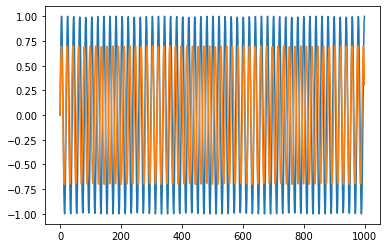

In [4]:

points = 1000
freq = 0.3157
t = np.linspace(0,points,points)
sin1 = 1.0*np.sin(freq*t)
sin2 = 0.7*np.sin((freq+.02)*t)

plt.plot(sin1)
plt.plot(sin2)

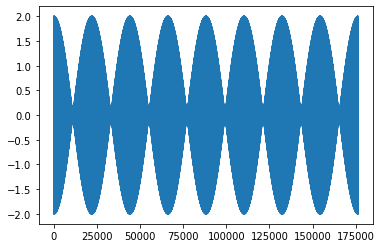

In [5]:
sin440 = sinusoid(freq=440, dur=4)
sin442 = sinusoid(freq=442, dur=4)

sinbeats = sin440 + sin442
sf.write("sinbeats.wav", sinbeats, 44100)

plt.plot(sinbeats)

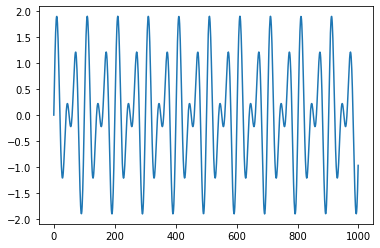

In [6]:
'''
Combination tones are heard when two pure tones more than ~50hz apart are summed.
For example, the perfect 5th is a difference tone resulted from summing together the 3rd and 2nd
harmonic since this forms a 3:2 ratio which is by definition a perfect 5th.

In this case, the combination tone is perceived as the fundamental frequency, or the 1st harmonic
''' 

p5th = sinusoid(freq=440*2) + sinusoid(freq=440*3)
sf.write('p5th.wav', p5th, 44100)
plt.plot(p5th[:1000])

### Question 5


In [7]:
# Helper fucntions
def is_close(num1, num2, tol):
    return abs(num2 - num1) < tol
    
def dot_amplitude(data1, data2): 
    dot_product = np.dot(data1, data2)
    return 2 * (dot_product / len(data1))

def triangle_wave(freq, duration, precision):
    # compute number of samples
    srate = 44100
    t = np.linspace(0, duration, srate * duration)
    wave = np.zeros(srate*duration)
    
    # compute triangle wave
    for i in range(0, precision):
        n = 2*i+1
        harm = (np.pi/4)*(-1)**i*n**-2*np.sin(2 * np.pi * freq * t * n)
        wave += harm
        
    return wave

def harmonics(fundamental=440.0, dur=1.0, srate=44100.0, amps = [1.0]):
    # normalize amps 
    amps = amps / np.sum(amps)
    t = np.linspace(0, dur, int(srate*dur))
    data = np.zeros(len(t))
    for (i,a) in enumerate(amps): 
        hfreq = (i+1) * fundamental
        harm = a * np.sin(2*np.pi* hfreq *t)
        data += harm
    return data

def is_sqaure_wave(freq, waveform, dur, amp):
    decimal_precision = 3
    harmonics_to_compare = 7
    
    for i in range(1, harmonics_to_compare+1, 2):
        expected_amp = amp/i
        
        harm = sinusoid(freq=i*freq, dur=dur)
        actual_amp = dot_amplitude(harm, waveform)
        if not is_close(actual_amp, expected_amp, 0.0001):
            return False
    
    return True

def is_triangle_wave(freq, waveform, dur, amp):
    decimal_precision = 3
    harmonics_to_compare = 8
    limit = int( (harmonics_to_compare-1)/2 ) 
    
    for i in range(0, limit):
        n = 2*i+1 # nth harmonic
        expected_amp = n**-2*(amp/math.sqrt(n))
        harm = (math.pi/4)*sinusoid(freq=n*freq, dur=dur)
        actual_amp = dot_amplitude(harm, waveform)
        
        if not is_close(actual_amp, expected_amp, 0.17):
            return False
    
    return True

def is_sine_wave(freq, waveform, dur):
    decimal_precision = 3
    harmonics_to_compare = 5
    
    for i in range(2, harmonics_to_compare+1):        
        harm = sinusoid(freq=i*freq, dur=dur)
        actual_amp = dot_amplitude(harm, waveform)
        if not is_close(actual_amp, 0.0, 0.0001):
            return False
    
    return True

# Function for question
def identify_waveform(freq, waveform):
    dur = len(waveform)/44100
    basis = sinusoid(freq=freq, dur=dur)
    
    estimated_amplitude = dot_amplitude(basis, waveform)
    if is_sine_wave(freq, waveform, dur):
        return 'sine'
    elif is_sqaure_wave(freq, waveform, dur, estimated_amplitude):
        return 'sqaure'
    elif is_triangle_wave(freq, waveform, dur, estimated_amplitude):
        return 'triangle'
    else:
        return 'undefined waveform'

# Driver code for testing
freq = 20
amp_factor = 1
square_amps = [1.0, 0.0, 1.0/3.0, 0.0, 1.0/5.0, 0.0, 1.0/7.0, 0.0, 1.0/9.0, 0.0, 1.0/11.0]

square_wave = amp_factor*(4/math.pi)*harmonics(fundamental=freq, amps = square_amps)
triangle_wave = triangle_wave(freq=freq, duration=1, precision=3)
sine_wave = amp_factor*sinusoid(freq=freq)

identify_waveform(freq, triangle_wave)




'triangle'